# Data ratio of credit form countries (Moodi's)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy import stats as st

In [ ]:
df_ratio = pd.read_excel('C:/GoogleDisk/2025/статьи/Кредитные рейтинги.xlsx', header=0,  usecols="K:N", skiprows = 52)
df_rario_research = df_ratio.pivot(index='Country',columns='Year', values=['Score', 'Ratio']).reset_index()
df_rario_research.head(3)

Country Score              Ratio                
Year             2021 2023          2021            2023
0     Австралия    22   22  Aaa (Stable)    Aaa (Stable)
1        Англия    18   17  Aa3 (Stable)  Aa3 (Negative)
2     Аргентина     1    1   Ca (Stable)     Ca (Stable)

T статистика и p-value

In [3]:
df_rario_research[('m', 'diff')] = df_rario_research.loc[:, ('Score', 2023)] \
- df_rario_research.loc[:, ('Score', 2021)] # multyIndex colunms

m_avg = df_rario_research.m.mean()
n = df_rario_research.shape[0]
m_sigma = df_rario_research.m.std()
t_pair = m_avg/(m_sigma/(n**0.5))
print(t_pair)
t_stat_pair, p_val_pair = st.ttest_rel(df_rario_research.loc[:, ('Score', 2023)], \
                                       df_rario_research.loc[:, ('Score', 2021)])

print(f'T-статистика: {t_stat_pair:.2f} и p-value: {p_val_pair:.1%}')

Year
diff   -1.463159
dtype: object
T-статистика: -1.46 и p-value: 15.6%


VISUAL

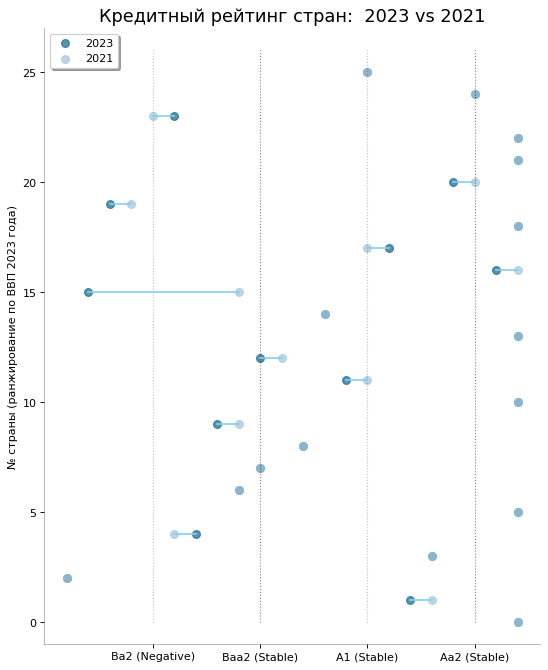

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,10), facecolor='#ffffff', dpi= 80)
# Vertical Lines
ax.vlines(x=5, ymin=0, ymax=26, color='black', alpha=.25, linewidth=1, linestyles='dotted')
ax.vlines(x=10, ymin=0, ymax=26, color='black', alpha=.5, linewidth=1, linestyles='dotted')
ax.vlines(x=15, ymin=0, ymax=26, color='black', alpha=.25, linewidth=1, linestyles='dotted')
ax.vlines(x=20, ymin=0, ymax=26, color='black', alpha=.5, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df_rario_research.index, x=df_rario_research.loc[:, ('Score', 2023)], s=50, color='#0e668b', alpha=0.7, label = '2023')
ax.scatter(y=df_rario_research.index, x=df_rario_research.loc[:, ('Score', 2021)], s=50, color='#a3c4dc', alpha=0.7, label = '2021')
# lines for Diff
ax = plt.gca()
for i in range(df_rario_research.shape[0]):
    ax.add_line(mlines.Line2D([df_rario_research.loc[:, ('Score', 2021)][i], df_rario_research.loc[:, ('Score', 2023)][i]], [df_rario_research.index[i], df_rario_research.index[i]], color='skyblue')) # x1 x2  y1 y2

ax.set_title("Кредитный рейтинг стран:  2023 vs 2021", fontdict={'size':16})
ax.set(ylabel='№ страны (ранжирование по ВВП 2023 года)',  ylim=(-1, 27))
plt.legend(shadow = True, framealpha = 1, loc='upper left')
ax.set_xticks([5, 10, 15, 20])
ax.set_xticklabels(['Ba2 (Negative)', 'Baa2 (Stable)', 'A1 (Stable)', 'Aa2 (Stable)'])
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 